## Load Data

In [1]:
# fashion_mnist
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Reshape Data

In [2]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## Better Optimizer

In [3]:
# solution 3: Better optimizer
initializer = tf.keras.initializers.RandomNormal()

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(10))

#################### YOUR CODE HERE ####################
# Các bạn thực hiện code để khi model compile sẽ 
# dùng optimizer là Adam
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])
########################################################
# training
batch_size = 512
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=300, verbose=2)

Epoch 1/300
118/118 - 4s - loss: 2.2993 - accuracy: 0.1172 - val_loss: 2.0502 - val_accuracy: 0.1973 - 4s/epoch - 36ms/step
Epoch 2/300
118/118 - 2s - loss: 1.5978 - accuracy: 0.3135 - val_loss: 1.3034 - val_accuracy: 0.4230 - 2s/epoch - 18ms/step
Epoch 3/300
118/118 - 2s - loss: 1.1969 - accuracy: 0.4649 - val_loss: 1.1467 - val_accuracy: 0.4961 - 2s/epoch - 17ms/step
Epoch 4/300
118/118 - 2s - loss: 1.0780 - accuracy: 0.5248 - val_loss: 1.0832 - val_accuracy: 0.5217 - 2s/epoch - 17ms/step
Epoch 5/300
118/118 - 2s - loss: 1.0449 - accuracy: 0.5445 - val_loss: 1.0200 - val_accuracy: 0.5595 - 2s/epoch - 19ms/step
Epoch 6/300
118/118 - 2s - loss: 0.9688 - accuracy: 0.6018 - val_loss: 1.0133 - val_accuracy: 0.6117 - 2s/epoch - 17ms/step
Epoch 7/300
118/118 - 2s - loss: 0.9076 - accuracy: 0.6348 - val_loss: 0.9239 - val_accuracy: 0.6238 - 2s/epoch - 17ms/step
Epoch 8/300
118/118 - 2s - loss: 0.9077 - accuracy: 0.6198 - val_loss: 0.9110 - val_accuracy: 0.6369 - 2s/epoch - 17ms/step
Epoch 9/

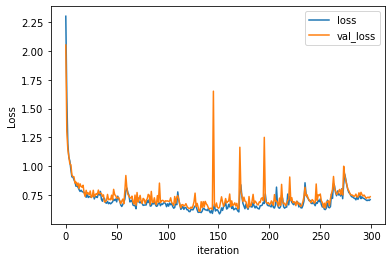

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

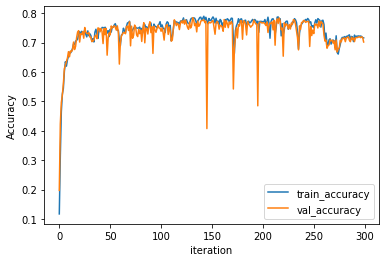

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()